## 1: Load Data

In [1]:
# Import Analysis Libraries
import numpy as np
import pandas as pd
import random
import sys
import re

# Import Visualization Libraries
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
# Configure Matplotlib graph production
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import Word Processing Libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer # Used over Porter Stemmer to allow scalability with additional languages in the future
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('stopwords')

# Import Machine Learning Libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import LatentDirichletAllocation

# Configure Seed Generation
seed_value = random.randrange(sys.maxsize) # Use this if you want a new seed value each Load 
# Else set manual Seed Value
random.seed(202020)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\russe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
DF = pd.read_csv('Review_data.csv', sep=',', header=0)
DF.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


In [3]:
# Check if any empty values
print('Empty Values:')
print(DF.isnull().sum(), '\n')
# Count values by review rating
print('Number of Entries per Review Rating')
print(DF.star_rating.value_counts())

Empty Values:
review_body    0
star_rating    0
dtype: int64 

Number of Entries per Review Rating
1    3000
2    3000
3    3000
4    3000
5    3000
Name: star_rating, dtype: int64


In [4]:
# Store only Text Body component for Machine Learning model
body_data = DF.loc[:, 'review_body'].tolist()

# View Some Entries
for i in range(5):
    print(body_data[i],'\n')

Good luck finding a reasonably priced band replacement. I ordered the band from the dealer who sold it to me (no one else in town could get one) and Skagen sent the wrong one.  I guess I'll try again, but not allowing anyone else to make bands for your unique watch design seems stupid. I will certainly never buy one again. 

No i get dark on the first week with me!! I will never buy this item and i had buy 5 of them 

I dont know if mine was a mistake but it clearly states aqua so im confused why mine is lime green. I hate lime green and am very irritated. This is why people hate ordering on amazon. Ive spent 100s of dollars on here latey and this one will make me not want to order.  At least its not much money. Just annoying thinking u ordered something and get something else.  Well its going in the trash... 

The rod that holds the bracelet broke several times and the company do not fix it, it is sitting on the drawer so I can come to see the Jeweler to try to fix one more time. Don'

## 2: Word Processing

In [5]:
print(len(stopwords), 'Stopwords used from library')

179 Stopwords used from library


In [23]:
# Preprocess data sequentially
def pre_process(target_data):
    
    # Remove Punctuation and Numerics
    text = re.sub(r'[^a-zA-Z]',' ',target_data)
    # Tokenize processed text
    tokenized = word_tokenize(text)
    # Initialize Stemmer
    stemmer = SnowballStemmer("english")
    # Process with stemming
    corpus = []
    for word in tokenized:
        cleaned_token = stemmer.stem(word).lower().strip()
        if cleaned_token not in stopwords:
            corpus.append(cleaned_token)
    return corpus

In [24]:
word_corpus = pre_process(body_data[0])
word_corpus[:5]

['good', 'luck', 'find', 'reason', 'price']

## 3: TF-IDF Set Up

In [26]:
tfidf_model = TfidfVectorizer(
    # max_df : maximum document frequency for the given word
    max_df=0.99,
    # max_features: maximum number of words
    max_features=1000, 
    # min_df : minimum document frequency for the given word
    min_df=0.01,
    # use_idf: if not true, we only calculate tf
    use_idf=True, 
    tokenizer=pre_process,
    # ngram_range: (min, max), eg. (1, 2) including 1-gram, 2-gram
    ngram_range=(1,2))


# Fit the TfidfVectorizer to the data
tfidf_matrix = tfidf_model.fit_transform(body_data) 


print("Total {} reviews and {} terms.".format(str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])))

Total 15000 reviews and 519 terms.


In [27]:
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.99,
 'max_features': 1000,
 'min_df': 0.01,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.pre_process(target_data)>,
 'use_idf': True,
 'vocabulary': None}

In [28]:
tf_words = tfidf_model.get_feature_names()

In [29]:
tfidf_matrix

<15000x519 sparse matrix of type '<class 'numpy.float64'>'
	with 258600 stored elements in Compressed Sparse Row format>

## 4: Cluster Data

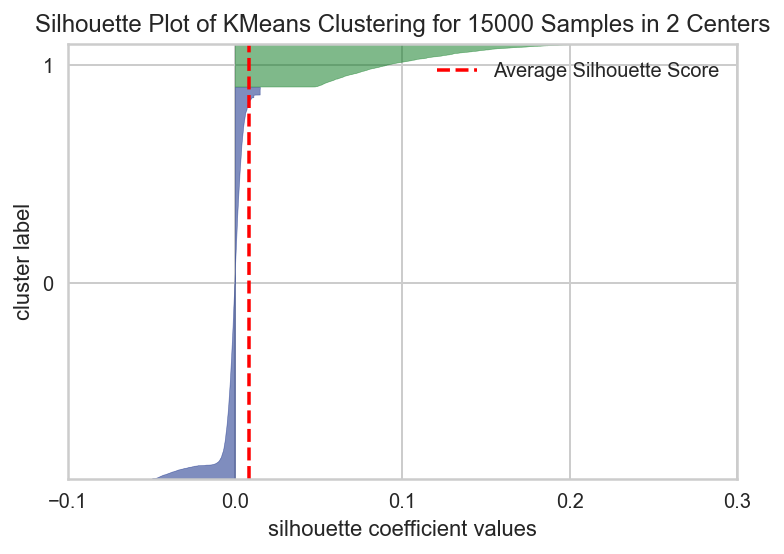

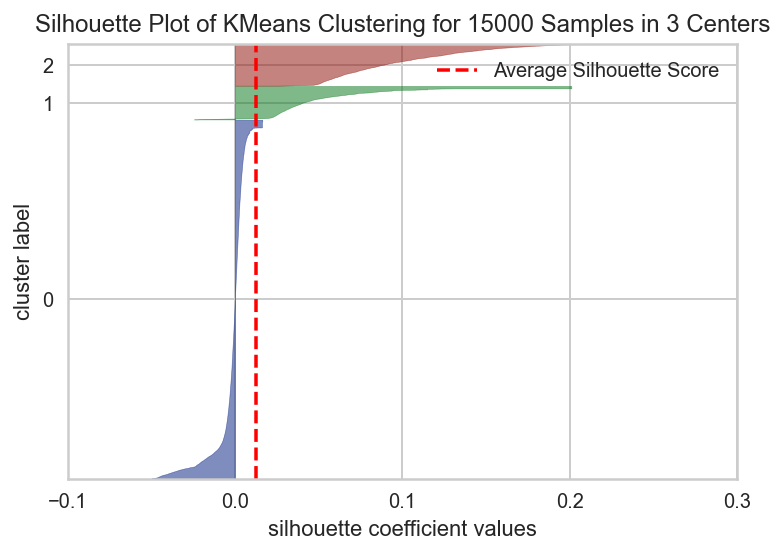

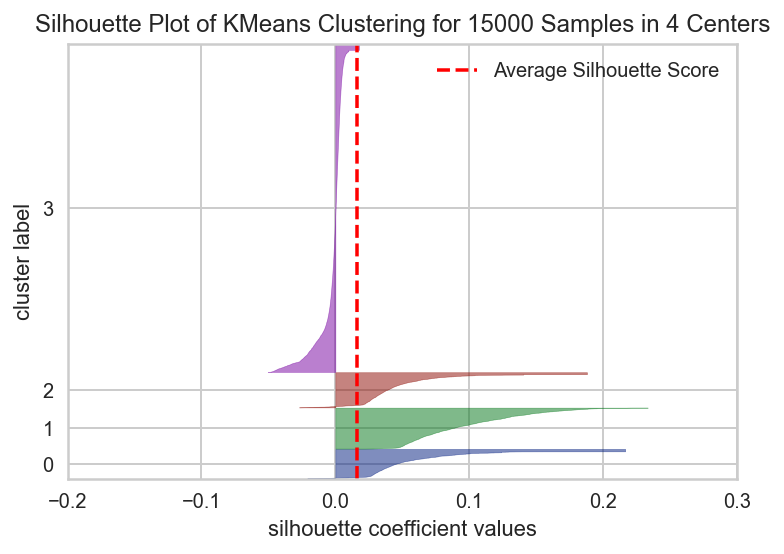

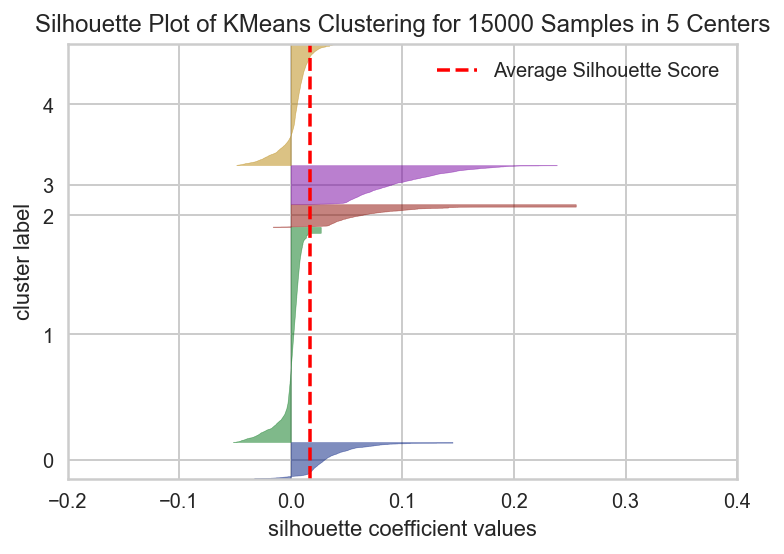

In [32]:
number_clusters = range(2,6)
for center in number_clusters:
    Kmeans = KMeans(n_clusters=center)
    model_km = SilhouetteVisualizer(Kmeans,colors='sns_dark')
    model_km.fit(tfidf_matrix)
    model_km.show()

In [35]:
# Select 3 as number of clusters to analyze for
K_model = KMeans(n_clusters=3)
K_model.fit(tfidf_matrix)

KMeans(n_clusters=3)

In [42]:
K_result = DF.rename(columns={'review_body':'review'})
clusters = K_model.labels_.tolist()
K_result['clusters'] = clusters

In [43]:
K_result.head()

,review,star_rating,clusters
0,Good luck finding a reasonably priced band rep...,1,0
1,No i get dark on the first week with me!! I wi...,1,0
2,I dont know if mine was a mistake but it clear...,1,0
3,The rod that holds the bracelet broke several ...,1,0
4,"I bought 2 watches , one watch doesnot work at...",1,0


In [49]:
# Cluster breakdown
cluster_size = K_result['clusters'].value_counts().to_frame()
print(cluster_size,'\n')
print(K_result.groupby('clusters')['star_rating'].value_counts())

   clusters
0     12457
1      1443
2      1100 

clusters  star_rating
0         1              2635
          2              2593
          5              2501
          3              2445
          4              2283
1         4               335
          3               318
          2               282
          1               271
          5               237
2         4               382
          5               262
          3               237
          2               125
          1                94
Name: star_rating, dtype: int64


## 5: Visualize Cluster Data

C:\Users\russe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

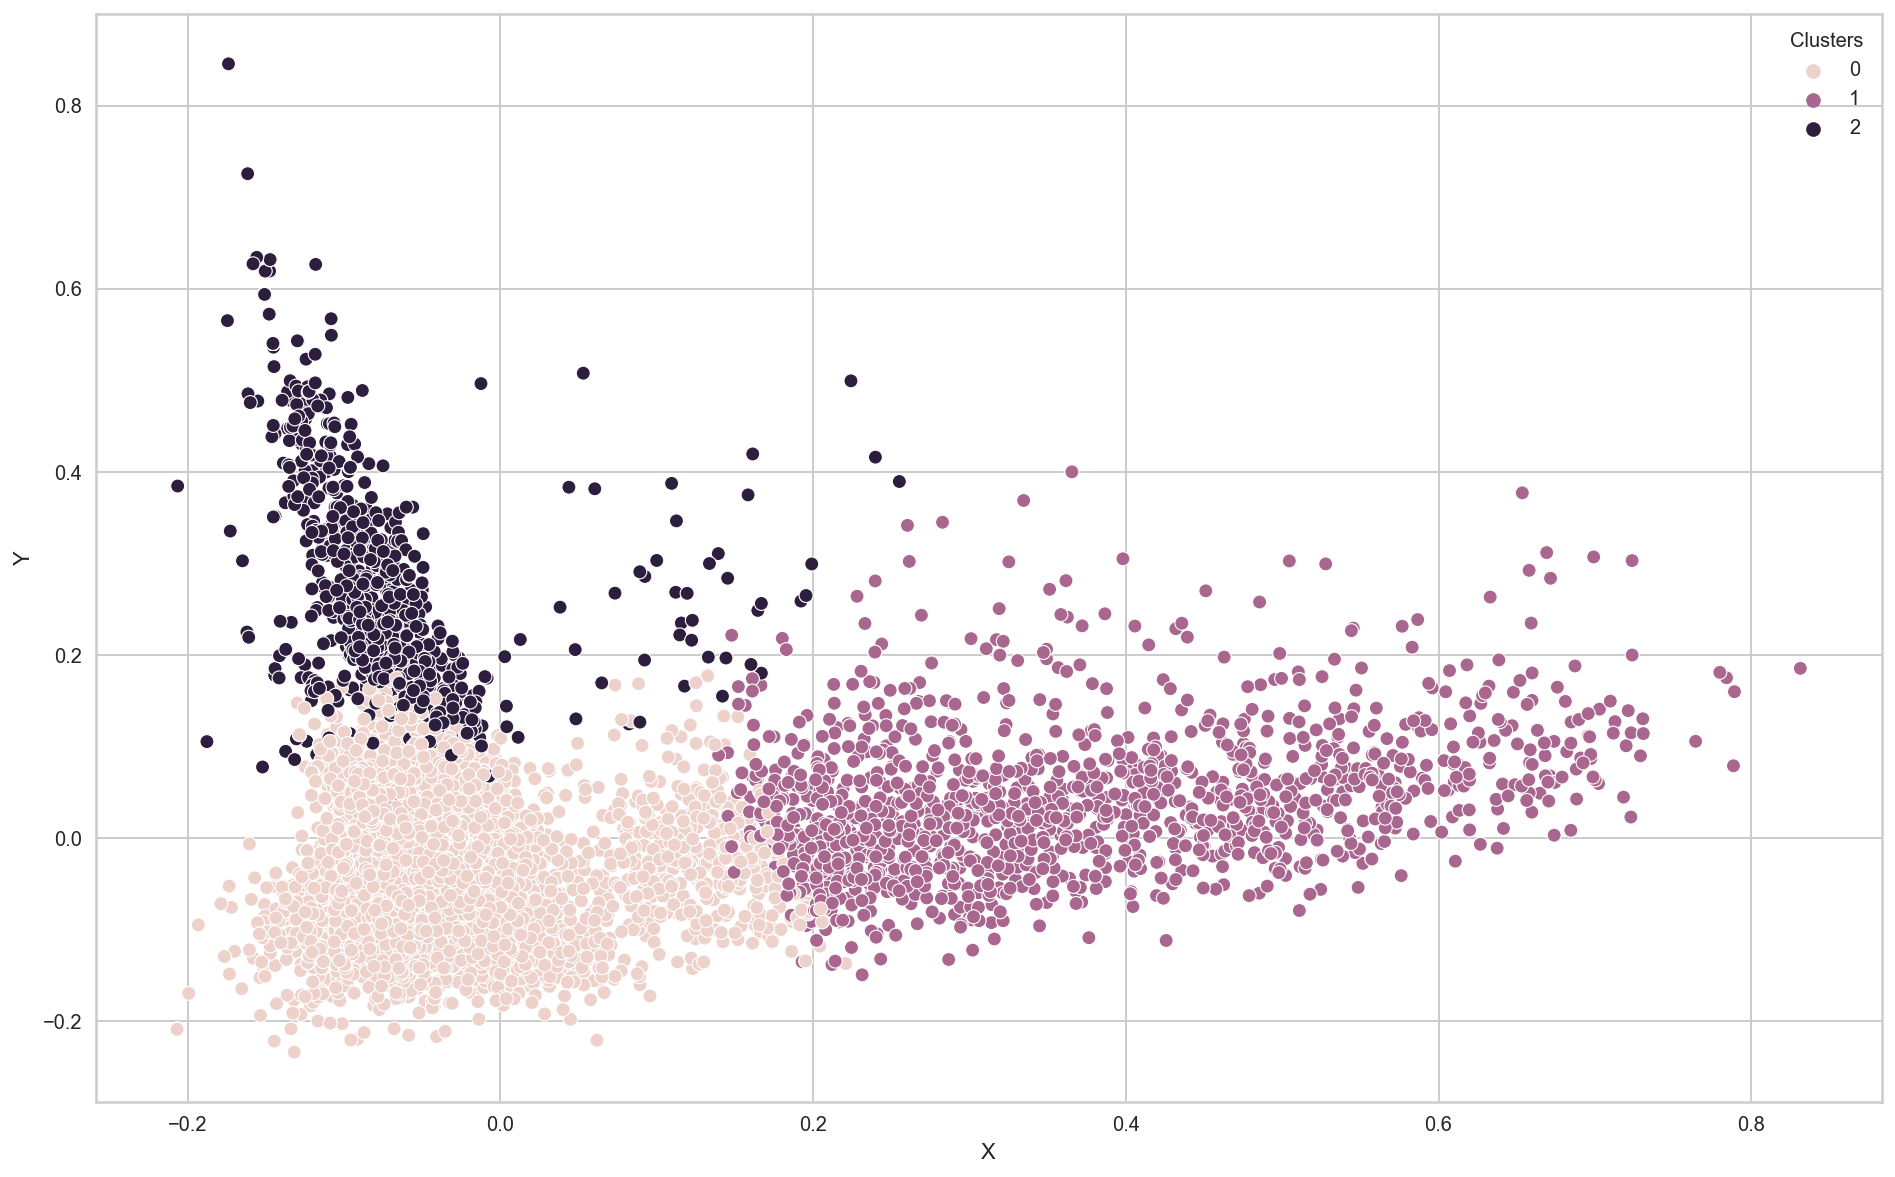

In [61]:
# Initialize PCA Kernel
PCA = KernelPCA(n_components=2)
# Convert matrix to numpy array
tfidf_matrix_np = tfidf_matrix.toarray()
# Fit converted numpy array to PCA
X = PCA.fit_transform(tfidf_matrix_np)
x_ = X[:, 0]
y_ = X[:, 1]

PCA_DF = pd.DataFrame(dict(X=x_, Y=y_, Clusters=clusters))
plt.subplots(figsize=(16,10))
sns.scatterplot('X', 'Y', data=PCA_DF, hue='Clusters')

## 6: LDA for Topic Modelling

In [64]:
# Initialize LDA
LDA = LatentDirichletAllocation(n_components=3)
# Set up Vectorizer Parameters
tf_LDA = CountVectorizer(
                        max_df=0.99,
                        max_features=500,
                        min_df=0.01,
                        tokenizer=pre_process,
                        ngram_range=(1,2))
# Fit data to initialized vectorizer
tf_matrix_LDA = tf_LDA.fit_transform(body_data)

print("Total {} reviews and {} terms.".format(str(tf_matrix_LDA.shape[0]), str(tf_matrix_LDA.shape[1])))
print(tf_matrix_LDA.shape)

Total 15000 reviews and 500 terms.
(15000, 500)


In [69]:
# Examine Feature dimensions
LDA_Features = tf_LDA.get_feature_names()
print(LDA_Features[:5])

# Generate Topic Matrix using LDA
LDA_output = LDA.fit_transform(tf_matrix_LDA)
print(LDA_output.shape)

['abl', 'absolut', 'accur', 'actual', 'adjust']
(15000, 3)


In [71]:
LDA.components_.shape

(3, 500)